## DERIVATIVE PRICING
MODULE 2 | LESSON 1


---



# **INTRO TO AMERICAN OPTIONS**


|  |  |
|:---|:---|
|**Reading Time** |  60 minutes |
|**Prior Knowledge** | Binomial model, Option pricing |
|**Keywords** | American options, Early-exercise, Volatility matching|


---

*In this lesson, we are going to introduce the American payoff and how to implement the pricing of an American option with Python. Let's start importing some of the libraries that we will need to use down the road:*

In [1]:
import numpy as np

## 1. American Options Payoff

An American option is a style of options contract that allows holders to exercise their rights at any time before and on the expiration date. Thus, American-style options allow investors to capture profit as soon as the stock price moves favorably.

The value of this option, if it is left alive until maturity, is the same as its European counterpart. On the other hand, the value of the option if it is exercised is given by:

$$max(0, S_t-K)$$ 

in the call case and,

$$max(0, K-S_t)$$ 

in the put case.



Thus, the **first step** consists of computing the European option prices for each node in the tree. 

Second, for each node, we get the maximum value between the European option price and the payoff from early exercise.

For instance, if we follow the slide example:
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

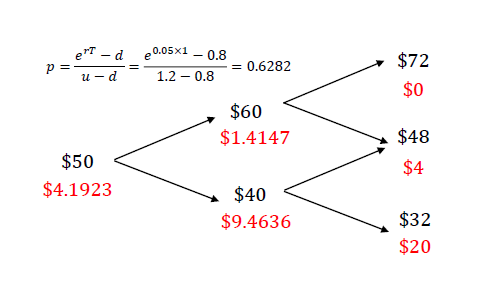

The above figure shows the European option price for each node. In the **second step**, we decide whether to exercise the option in each node. Thus, in the next figure, we are going to keep the maximum value (in each node) between the European option price and the payoff from early exercise. See figure below:

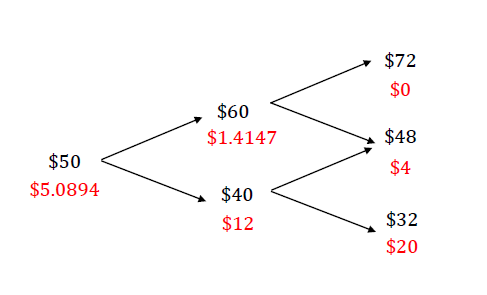

The node that changes from the European option price to the American price is node {d}. **Why?** It is simple: We are comparing the European option price, $9.4636, with the payoff from early excercise, which is given by:

$$K-S = $52 - $40 = $12 > 9.4636$$

Just for completeness, in the other node in which we should make a decision, {u}, the payoff from early exercise is lower than the European option price:

$$K - S = $52 - $60 = - $8 < $1.4247$$

In [2]:
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S

## 2. Numerical Interpretation

Thus, for an American call, the value of the American option at a node is given by:

$$C(S,K,t) = max(S-K, e^{-rt}\left[C(uS, t+dt)p^*+C(dS, t+dt)(1-p^*)\right]$$ 

where, 

$$e^{-rt}\left[C(uS, t+dt)p^*+C(dS,t+dt)(1-p^*)\right]$$ 

represent the expected discounted value of "leaving alive" the option for another period (European option price). In other words,\

$$ e^{-rt} E^{*}[C(t+dt)] = e^{-rt} \left[C(uS, t+dt)p^*+C(dS,t+dt)(1-p^*)\right]$$


Thus, in each node, we will make the decision of exercising the option only if the expected discounted value of the call in the next period is less than the value that we get if we decide to exercise the option.


Finally, let's try to reproduce our "toy-model" using the code. Remember the "toy-model" parameters (European Put Option):

$$u = 1.2, d = 0.8, T = 2 = N , dt = 1, r = 5\%, K=52, S_0 = 50$$

In [3]:
option_price, C, S = american_option(145, 100, 100, 0.1, 1.2, 0.8, 100, "P")

First, we check the underlying evolution...

In [4]:
S

array([[1.45000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16000000e+02, 1.74000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.28000000e+01, 1.39200000e+02, 2.08800000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.61515963e-08, 6.92273945e-08, 1.03841092e-07, ...,
        8.33930993e+09, 0.00000000e+00, 0.00000000e+00],
       [3.69212771e-08, 5.53819156e-08, 8.30728734e-08, ...,
        6.67144795e+09, 1.00071719e+10, 0.00000000e+00],
       [2.95370217e-08, 4.43055325e-08, 6.64582987e-08, ...,
        5.33715836e+09, 8.00573754e+09, 1.20086063e+10]])

Second, we check the option price in each node...

In [5]:
C

array([[6.62571813e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.26752458e+00, 2.55184097e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.68873280e+00, 8.95515925e-01, 9.13844093e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+02, 9.99999999e+01, 9.99999999e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+02, 9.99999999e+01, 9.99999999e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+02, 1.00000000e+02, 9.99999999e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Thus, finally, the price of the American put is given by...

In [6]:
print(option_price)

0.662571812972355


## 3. Matching Volatility in the American Option Function

Finally, in the next function, we compute the parameters "u" and "d" as a function of the underlying volatility (see Module 1, Lesson 4). 

In [7]:
def american_option_vol(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S

To conclude this example, let's try to get the price of an American option with the same parameters as the European call option of Module 1 (Lesson 4). That is: 

$$K=90, r=0\%, T=1, \sigma=0.3$$


In [8]:
price, C, S = american_option_vol(100, 90, 10, 0, 0.3, 10, "C")
print(price)

39.899240766330934


Finally, let's now see what call option ($K=90$, $r=0\%$, $T=1$, $\sigma=0.3$) price we obtain for different N's:

In [9]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
    call_price, C, S = american_option_vol(100, 90, 1, 0, 0.3, N, "C")
    price_array.append(call_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, call_price))

With N =   1, the price is 19.14
With N =  10, the price is 17.26
With N = 100, the price is 17.02
With N = 200, the price is 17.03
With N = 300, the price is 17.01
With N = 400, the price is 17.02
With N = 500, the price is 17.01
With N = 600, the price is 17.02
With N = 700, the price is 17.02
With N = 800, the price is 17.01
With N = 900, the price is 17.01
With N = 1000, the price is 17.02
With N = 1500, the price is 17.01
With N = 2000, the price is 17.01
With N = 2500, the price is 17.01


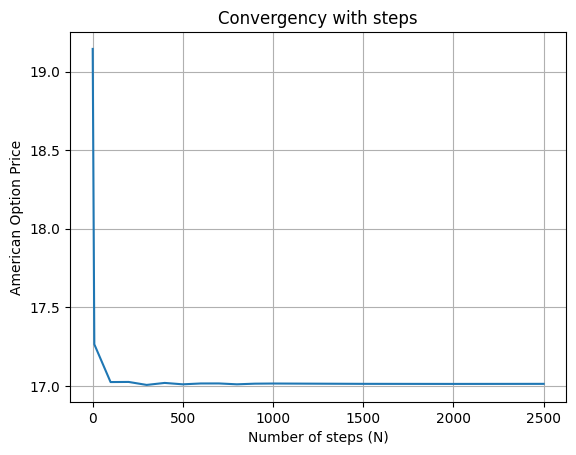

In [10]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("American Option Price")
plt.grid(True)
plt.show()

## 4. Conclusion

In this lesson, we have gone over the basics of American option pricing and the fundamental differences compared to European options. In the next lesson, we will revisit the concept of delta hedging in the context of American derivatives. 

---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
